In [1]:
import numpy as np
import pandas as pd
import datetime
pd.options.display.max_columns = 1000

In [2]:
prost= pd.read_csv('data\PROSTITUTION.csv', index_col=0)
prost.head()

,cas,curr_off_lit,fda,bam,curr_off,curr_l_d,def_rac,def_sex,def_dob,aty_coc,aty_coc_lit,disposition,sentence,dispdt,comp_agency,Latitude,Longitude,judge,offcat,location,length,ageatfiling,num,date_unit,sentence_length,com_off,com_off_lit
1,1.246928e+11,PROSTITUTION,2010-01-06,15000.0,400405,FS,W,F,1970-08-19,AAT,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,90 DAYS HCJ,20100107,HOUSTON POLICE DEPARTMENT,29.837129,-95.363460,Herb Ritchie,Prostitution,HCJ,90 DAYS,39.0,90.0,DAYS,90.0,400405.0,PROSTITUTION
2,1.246998e+11,PROSTITUTION,2010-01-06,15000.0,400405,FS,W,F,1975-06-07,AAT,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,6 MONTHS STATE JAIL,20100108,HOUSTON POLICE DEPARTMENT,NaN,-95.311924,George Powell,Prostitution,STATE JAIL,6 MONTHS,34.0,360.0,DAYS,360.0,400405.0,PROSTITUTION
3,1.247063e+11,PROSTITUTION,2010-01-06,15000.0,400405,FS,B,F,1968-07-05,AAT,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,6 MONTHS STATE JAIL,20100126,HOUSTON POLICE DEPARTMENT,29.775185,-95.332333,Kelli Johnson,Prostitution,STATE JAIL,6 MONTHS,41.0,360.0,DAYS,360.0,400405.0,PROSTITUTION
4,1.247082e+11,PROSTITUTION,2010-01-07,15000.0,400405,FS,W,F,1969-09-30,AAT,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,6 MONTHS STATE JAIL,20100108,HOUSTON POLICE DEPARTMENT,29.795460,-95.474322,Jeannine Barr,Prostitution,STATE JAIL,6 MONTHS,40.0,360.0,DAYS,360.0,400405.0,PROSTITUTION
5,1.247085e+11,PROSTITUTION,2010-01-07,15000.0,400405,FS,B,F,1963-05-03,AAT,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,180 DAYS HCJ,20100111,HOUSTON POLICE DEPARTMENT,29.754245,-95.351095,Denise Collins,Prostitution,HCJ,180 DAYS,46.0,180.0,DAYS,180.0,400405.0,PROSTITUTION


In [3]:
#how do I drop the time from returning?
prost['fda'] = pd.to_datetime(prost.fda)
prost['dispdt'] = pd.to_datetime(prost.dispdt, format='%Y%m%d')
#datetime.datetime.strptime(str(prost.dispdt),'%Y%m%d' )

In [4]:
prost['disptdayofweek'] = prost.dispdt.dt.dayofweek

In [5]:
#drop duplicate "sentence length col"
prost = prost.T.drop_duplicates().T

In [6]:
prost.head(2)

,cas,curr_off_lit,fda,bam,curr_off,curr_l_d,def_rac,def_sex,def_dob,aty_coc,aty_coc_lit,disposition,sentence,dispdt,comp_agency,Latitude,Longitude,judge,offcat,location,length,ageatfiling,num,date_unit,com_off,com_off_lit,disptdayofweek
1,1.24693e+11,PROSTITUTION,2010-01-06 00:00:00,15000,400405,FS,W,F,1970-08-19,AAT,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,90 DAYS HCJ,2010-01-07 00:00:00,HOUSTON POLICE DEPARTMENT,29.8371,-95.3635,Herb Ritchie,Prostitution,HCJ,90 DAYS,39,90,DAYS,400405,PROSTITUTION,3
2,1.247e+11,PROSTITUTION,2010-01-06 00:00:00,15000,400405,FS,W,F,1975-06-07,AAT,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,6 MONTHS STATE JAIL,2010-01-08 00:00:00,HOUSTON POLICE DEPARTMENT,NaN,-95.3119,George Powell,Prostitution,STATE JAIL,6 MONTHS,34,360,DAYS,400405,PROSTITUTION,4


In [7]:
prost['cas'] = pd.to_numeric(prost.cas, downcast='integer')
prost['bam'] = pd.to_numeric(prost.bam, downcast='integer')
prost['Latitude'] = pd.to_numeric(prost.Latitude)#, downcast='integer')
prost['Longitude'] = pd.to_numeric(prost.Longitude)#, downcast='integer')
prost['ageatfiling'] = pd.to_numeric(prost.ageatfiling, downcast='integer')

In [14]:
prost['Latitude'] = prost.Latitude.fillna(np.mean(prost.Latitude))
prost['bam'] = prost.bam.fillna(np.mean(prost.bam))
prost['ageatfiling'] = prost.ageatfiling.fillna(np.mean(prost.ageatfiling))

In [8]:
list(prost.columns.values)

['cas',
 'curr_off_lit',
 'fda',
 'bam',
 'curr_off',
 'curr_l_d',
 'def_rac',
 'def_sex',
 'def_dob',
 'aty_coc',
 'aty_coc_lit',
 'disposition',
 'sentence',
 'dispdt',
 'comp_agency',
 'Latitude',
 'Longitude',
 'judge',
 'offcat',
 'location',
 'length',
 'ageatfiling',
 'num',
 'date_unit',
 'com_off',
 'com_off_lit',
 'disptdayofweek']

In [9]:
features = [
    'cas',
 'curr_off_lit',
 #'fda',
 'bam',
 #'curr_off',
 #'curr_l_d',
 'def_rac',
 'def_sex',
 #'def_dob',
 #'aty_coc',
 'aty_coc_lit',
 #'disposition',
 #'sentence',
 #'dispdt',
 'comp_agency',
 'Latitude',
 'Longitude',
 'judge',
 #'offcat',
 #'location',
 #'length',
 'ageatfiling',
 #'num',
 #'date_unit',
 #'com_off',
 'com_off_lit',
 'disptdayofweek'
]

In [10]:
xtrain = prost[features]
xtrain= pd.get_dummies(xtrain, columns= ['disptdayofweek', 'judge', 'def_sex', 'def_rac', 'aty_coc_lit', 'comp_agency', 'curr_off_lit', 'com_off_lit'])

In [11]:
xtrain.head(2)

,cas,bam,Latitude,Longitude,ageatfiling,disptdayofweek_0,disptdayofweek_1,disptdayofweek_2,disptdayofweek_3,disptdayofweek_4,judge_Analia Wilkerson,judge_Bill Harmon,judge_Brad Hart,judge_Catherine Evans,judge_Dan Spjut,judge_Darrell Jordan,judge_Denise Bradley,judge_Denise Collins,judge_Diane Bull,judge_Don Smyth,judge_George Powell,judge_Hazel Jones,judge_Herb Ritchie,judge_Jan Krocker,judge_Jay Karahan,judge_Jean Spradling,judge_Jeannine Barr,judge_Jim Wallace,judge_John Clinton,judge_Katherine Cabaniss,judge_Kelli Johnson,judge_Kristin Guiney,judge_Larry Standley,judge_Marc Carter,judge_Margaret Harris,judge_Maria Jackson,judge_Mike Fields,judge_Mike McSpadden,judge_Natalie Fleming,judge_Nikita Harmon,judge_Pam Derbyshire,judge_Paula Goodhart,judge_Ramona Franklin,judge_Randy Roll,judge_Robert Johnson,judge_Robin Brown,judge_Susan Brown,judge_Vanessa Velasquez,def_sex_F,def_sex_M,def_rac_A,def_rac_B,def_rac_I,def_rac_U,def_rac_W,aty_coc_lit_APPOINTED ATTORNEY ON APPEAL,aty_coc_lit_APPOINTED DEFENSE ATTORNEY,aty_coc_lit_APPOINTED PUBLIC DEFENDER,aty_coc_lit_HIRED ATTY ON APPEAL,aty_coc_lit_HIRED DEFENSE ATTORNEY,aty_coc_lit_PUBLIC DEFENDER APPOINTED ON APPEAL,comp_agency_ATTORNEY GENERAL STATE OF TEXAS,comp_agency_BAYTOWN POLICE DEPARTMENT,comp_agency_CONSTABLE PCT 1,comp_agency_CONSTABLE PCT 2,comp_agency_CONSTABLE PCT 3,comp_agency_CONSTABLE PCT 4,comp_agency_CONSTABLE PCT 5,comp_agency_CONSTABLE PCT 6,comp_agency_CONSTABLE PCT 7,comp_agency_CONSTABLE PCT 8,comp_agency_DEER PARK POLICE DEPARTMENT,comp_agency_DEPARTMENT OF PUBLIC SAFETY,comp_agency_HARRIS COUNTY D. A.,comp_agency_HOUSTON POLICE DEPARTMENT,comp_agency_JACINTO CITY POLICE DEPARTMENT,comp_agency_JERSEY VILLAGE POLICE DEPARTMENT,comp_agency_LA PORTE POLICE DEPARTMENT,comp_agency_METRO P. D. CITY OF HOUSTON,comp_agency_PASADENA POLICE DEPARTMENT,comp_agency_SEABROOK POLICE DEPARTMENT,comp_agency_SHERIFFS DEPARTMENT HARRIS COUNTY,comp_agency_TEXAS ALCOHOLIC BEVERAGE CONTROL,comp_agency_TOMBALL POLICE DEPARTMENT,comp_agency_U.H. CENTRAL CAMPUS PD,comp_agency_WEBSTER POLICE DEPARTMENT,curr_off_lit_AGG PROMOTION OF PROSTITUTION,curr_off_lit_AGG PROMOTION PROST,curr_off_lit_ATT AGG PROM OF PROSTITUTION,curr_off_lit_PROMOTE PROSTITUTION,curr_off_lit_PROSTITUTION,curr_off_lit_PROSTITUTION - NON PUBLIC OFFE,curr_off_lit_PROSTITUTION - PUBLIC OFFER,curr_off_lit_PROSTITUTION SOLICIT PERSON >1,curr_off_lit_PROSTITUTION WITH 3 OR MORE PR,curr_off_lit_PROSTITUTION-2ND,com_off_lit_AGG PROMOTION OF PROSTITUTION,com_off_lit_AGG PROMOTION PROST,com_off_lit_ATTEMPTED COMPEL PROSTITUTION,com_off_lit_BRIBERY,com_off_lit_COMPEL PROST BY FORCE/THREAT/F,com_off_lit_COMPEL PROSTITUTION-FORCE,com_off_lit_COMPEL PROSTITUTION-MINOR,com_off_lit_COMPELLING PROSTITUTION < 18 Y,com_off_lit_ENGAGING IN ORG CRIM ACTIVITY,com_off_lit_PROMOTE PROSTITUTION,com_off_lit_PROMOTE PROSTITUTION W/PREV CO,com_off_lit_PROSTITUTION,com_off_lit_PROSTITUTION - NON PUBLIC OFFE,com_off_lit_PROSTITUTION - PUBLIC OFFER,com_off_lit_PROSTITUTION PUBLIC PAY FEE 3,com_off_lit_PROSTITUTION SOLICIT PERSON >1,com_off_lit_PROSTITUTION WITH 3 OR MORE PR,com_off_lit_PROSTITUTION-2ND
1,124692801010,15000.0,29.837129,-95.363460,39.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,124699801010,15000.0,NaN,-95.311924,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,124706301010,15000.0,29.775185,-95.332333,41.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,124708201010,15000.0,29.795460,-95.474322,40.0,0,0,0,0,1,

In [12]:
#ytrain, get dummies on dispot
ytrain= pd.get_dummies(prost['disposition'])

In [13]:
ytrain.head(2)

,ACQ JURY VERDICT,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION BY TRIAL TO COURT,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DIRECTED VERDICT OF NOT GUILTY,DISM OTHER,DISMISSED,DISMISSED CASE REFILED,DISMISSED DEFENDANT CONVICTED ON ANOTHER CHARGE,DISMISSED INSUFFICIENT EVIDENCE,DISMISSED OTHER,DISMISSED TRANSFER CCCL REDUCED TO MISD.,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,LESSER OFF. NOT GUILTY PLEA-JURY VERDICT,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROB/DADJ TERMED - DEF DECEASED,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,REDUCED TO MISD.,UNSATISFACTORY TERMINATION
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xtrain, ytrain)
reg.score(xtrain, ytrain)

0.39008547533257598

In [16]:
reg.coef_

array([[ -5.79512951e-15,  -2.01211758e-10,  -3.29173185e-06, ...,
          6.35514304e-04,   4.62599314e-04,   9.33396992e-05],
       [ -9.85980843e-14,  -2.86888410e-09,  -1.96717817e-04, ...,
          8.98003686e-05,  -2.04205987e-05,  -4.82529021e-04],
       [ -6.16449117e-14,   1.79628154e-12,   4.79643271e-05, ...,
         -1.24290726e-03,  -8.47804724e-04,  -8.56392398e-04],
       ..., 
       [ -3.03122811e-14,   8.08409233e-10,  -1.93986365e-05, ...,
         -2.33483615e-04,  -7.37972022e-05,   3.17542779e-04],
       [ -7.39016978e-15,  -3.67377263e-10,   7.42688178e-05, ...,
          2.21561792e-04,   7.56178193e-04,   3.55309742e-04],
       [  3.01643114e-14,  -3.32370808e-09,  -8.41417291e-06, ...,
          1.63102828e-03,  -9.17070840e-03,   7.40126098e-04]])

In [17]:
reg.intercept_

array([  7.17338289e-04,   2.95128961e-02,  -3.55509486e-02,
        -4.20093521e-05,   1.27003556e-02,   8.51896669e-01,
         7.18527925e-02,   3.95888987e-01,   1.66185241e-01,
        -2.61689642e-04,  -4.74877785e-02,  -9.43776418e-01,
        -6.40504410e-03,   6.72408174e-02,  -2.19796351e-03,
         6.27610764e-02,   8.56883060e-02,   1.02080426e-03,
         3.04130271e-02,   1.70318891e-02,   4.34015647e-02,
         1.03918205e-01,  -4.37898956e-03,   1.33442243e-04,
         8.43181035e-04,   7.31804613e-03,   8.62358640e-03,
         1.20213351e-03,   3.75491269e-03,   8.56878286e-02,
        -7.69225833e-03])

In [18]:
reg.predict(xtrain)

array([[ -5.16043473e-04,   1.12134290e-03,  -4.49192701e-05, ...,
         -1.29439491e-04,   2.01984198e-04,   6.27874763e-04],
       [ -5.04711409e-04,  -1.18472950e-04,  -3.02856122e-03, ...,
          7.44872320e-04,   7.20663161e-05,   1.41731985e-03],
       [ -4.13966927e-04,   1.46906539e-03,   1.00765467e-03, ...,
         -7.49230679e-05,   4.77499292e-03,   4.22924433e-03],
       ..., 
       [  2.00627144e-05,  -3.84307949e-03,  -3.55443106e-03, ...,
         -1.20782946e-03,  -1.52182026e-04,   3.52982699e-03],
       [ -4.78344612e-04,  -9.60586642e-04,  -2.67028908e-03, ...,
          1.02275353e-03,  -5.04573171e-04,   2.66961253e-03],
       [ -5.66077986e-04,  -6.73092292e-04,  -1.70911972e-03, ...,
          1.37067410e-03,  -6.28469511e-04,   6.79639476e-03]])

In [20]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=11)

In [30]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.39297912933499352

In [31]:
reg.score(X_test, y_test)

0.37148470183020865

In [ ]:
#Experiment to look at which variables correlate

In [38]:
trial = xtrain.join(ytrain)
trial.head()

,cas,bam,Latitude,Longitude,ageatfiling,disptdayofweek_0,disptdayofweek_1,disptdayofweek_2,disptdayofweek_3,disptdayofweek_4,judge_Analia Wilkerson,judge_Bill Harmon,judge_Brad Hart,judge_Catherine Evans,judge_Dan Spjut,judge_Darrell Jordan,judge_Denise Bradley,judge_Denise Collins,judge_Diane Bull,judge_Don Smyth,judge_George Powell,judge_Hazel Jones,judge_Herb Ritchie,judge_Jan Krocker,judge_Jay Karahan,judge_Jean Spradling,judge_Jeannine Barr,judge_Jim Wallace,judge_John Clinton,judge_Katherine Cabaniss,judge_Kelli Johnson,judge_Kristin Guiney,judge_Larry Standley,judge_Marc Carter,judge_Margaret Harris,judge_Maria Jackson,judge_Mike Fields,judge_Mike McSpadden,judge_Natalie Fleming,judge_Nikita Harmon,judge_Pam Derbyshire,judge_Paula Goodhart,judge_Ramona Franklin,judge_Randy Roll,judge_Robert Johnson,judge_Robin Brown,judge_Susan Brown,judge_Vanessa Velasquez,def_sex_F,def_sex_M,def_rac_A,def_rac_B,def_rac_I,def_rac_U,def_rac_W,aty_coc_lit_APPOINTED ATTORNEY ON APPEAL,aty_coc_lit_APPOINTED DEFENSE ATTORNEY,aty_coc_lit_APPOINTED PUBLIC DEFENDER,aty_coc_lit_HIRED ATTY ON APPEAL,aty_coc_lit_HIRED DEFENSE ATTORNEY,aty_coc_lit_PUBLIC DEFENDER APPOINTED ON APPEAL,comp_agency_ATTORNEY GENERAL STATE OF TEXAS,comp_agency_BAYTOWN POLICE DEPARTMENT,comp_agency_CONSTABLE PCT 1,comp_agency_CONSTABLE PCT 2,comp_agency_CONSTABLE PCT 3,comp_agency_CONSTABLE PCT 4,comp_agency_CONSTABLE PCT 5,comp_agency_CONSTABLE PCT 6,comp_agency_CONSTABLE PCT 7,comp_agency_CONSTABLE PCT 8,comp_agency_DEER PARK POLICE DEPARTMENT,comp_agency_DEPARTMENT OF PUBLIC SAFETY,comp_agency_HARRIS COUNTY D. A.,comp_agency_HOUSTON POLICE DEPARTMENT,comp_agency_JACINTO CITY POLICE DEPARTMENT,comp_agency_JERSEY VILLAGE POLICE DEPARTMENT,comp_agency_LA PORTE POLICE DEPARTMENT,comp_agency_METRO P. D. CITY OF HOUSTON,comp_agency_PASADENA POLICE DEPARTMENT,comp_agency_SEABROOK POLICE DEPARTMENT,comp_agency_SHERIFFS DEPARTMENT HARRIS COUNTY,comp_agency_TEXAS ALCOHOLIC BEVERAGE CONTROL,comp_agency_TOMBALL POLICE DEPARTMENT,comp_agency_U.H. CENTRAL CAMPUS PD,comp_agency_WEBSTER POLICE DEPARTMENT,curr_off_lit_AGG PROMOTION OF PROSTITUTION,curr_off_lit_AGG PROMOTION PROST,curr_off_lit_ATT AGG PROM OF PROSTITUTION,curr_off_lit_PROMOTE PROSTITUTION,curr_off_lit_PROSTITUTION,curr_off_lit_PROSTITUTION - NON PUBLIC OFFE,curr_off_lit_PROSTITUTION - PUBLIC OFFER,curr_off_lit_PROSTITUTION SOLICIT PERSON >1,curr_off_lit_PROSTITUTION WITH 3 OR MORE PR,curr_off_lit_PROSTITUTION-2ND,com_off_lit_AGG PROMOTION OF PROSTITUTION,com_off_lit_AGG PROMOTION PROST,com_off_lit_ATTEMPTED COMPEL PROSTITUTION,com_off_lit_BRIBERY,com_off_lit_COMPEL PROST BY FORCE/THREAT/F,com_off_lit_COMPEL PROSTITUTION-FORCE,com_off_lit_COMPEL PROSTITUTION-MINOR,com_off_lit_COMPELLING PROSTITUTION < 18 Y,com_off_lit_ENGAGING IN ORG CRIM ACTIVITY,com_off_lit_PROMOTE PROSTITUTION,com_off_lit_PROMOTE PROSTITUTION W/PREV CO,com_off_lit_PROSTITUTION,com_off_lit_PROSTITUTION - NON PUBLIC OFFE,com_off_lit_PROSTITUTION - PUBLIC OFFER,com_off_lit_PROSTITUTION PUBLIC PAY FEE 3,com_off_lit_PROSTITUTION SOLICIT PERSON >1,com_off_lit_PROSTITUTION WITH 3 OR MORE PR,com_off_lit_PROSTITUTION-2ND,ACQ JURY VERDICT,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION BY TRIAL TO COURT,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DIRECTED VERDICT OF NOT GUILTY,DISM OTHER,DISMISSED,DISMISSED CASE REFILED,DISMISSED DEFENDANT CONVICTED ON ANOTHER CHARGE,DISMISSED INSUFFICIENT EVIDENCE,DISMISSED OTHER,DISMISSED TRANSFER CCCL REDUCED TO MISD.,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,LESSER OFF. NOT GUILTY PLEA-JURY VERDICT,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROB/DADJ TERMED - DEF DECEASED,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,REDUCED TO MISD.,UNSATISFACTORY TERMINATION
1,124692801010,15000.0,29.837129,-95.363460,39.0,0,0,0,

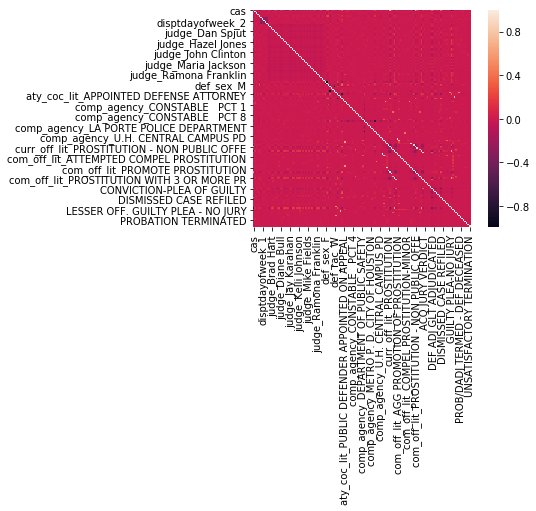

In [40]:
#visualized 'heatmap' of correlations between the variables 
import seaborn as sns
corrmat= trial.corr ()
sns.heatmap(corrmat, square=True)

In [44]:
from sklearn import preprocessing as pp

#change scale of data to range of 0 to 1
scaler = pp.MinMaxScaler()
scale = pd.DataFrame(scaler.fit_transform(trial), columns= trial.columns, index = trial.index)
#Set up IV matrix and DV array to test model accuracy
dv = ytrain.columns
for var in dv:
    print(var)
    y = pd.DataFrame()
    y = scale[var]
    X = scale.copy()
    del X[var]
    print(X.head())

sgdr = lm.SGDRegressor(n_iter=1000)  # or any sklearn regressor that you like
sgdr.fit(X,y)
sgdr.score(X, y)

ACQ JURY VERDICT
        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

        cas      bam  Latitude  Longitude  ageatfiling  disptdayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833               0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750               0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667               0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250               0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750               1.0   

   disptdayofweek_1  disptdayofweek_2  disptdayofweek_3  disptdayofweek_4  \
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               0.0               1.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               1.0   
5               0.0               0.0               0.0               0.0   

   judge_Analia Wilkerson  judge_Bill Harmon  judge_Brad Hart  \
1              

NameError: name 'lm' is not defined

In [19]:
#build simple models that only look at one variable at a time, then add in more variables

In [21]:
prost['case_len']= prost.dispdt - prost.fda

In [22]:
#subset to 2010-2015
sub = prost[prost.fda < pd.datetime(2015, 12, 31)]

In [23]:
max(sub.case_len)

Timedelta('2988 days 00:00:00')

In [24]:
np.mean(sub.case_len)

Timedelta('114 days 08:26:19.354838')

In [25]:
np.median(sub.case_len).astype('timedelta64[D]')

numpy.timedelta64(7,'D')

In [26]:
len(sub[sub.case_len > np.mean(sub.case_len)])/len(sub.case_len)

0.26297653958944284

In [27]:
from datetime import timedelta
len(sub[sub.case_len > timedelta(days = 365)])/len(sub.case_len)

0.08189149560117302